 Paso 1: Generar interacciones usuario-producto desde la base de datos

In [1]:
# generar_interacciones_usuario_producto.py
import sqlite3
import pandas as pd

# Conexión a la base de datos
conn = sqlite3.connect("instacart.db")

# Cargar los pedidos y productos
orders = pd.read_sql("SELECT order_id, user_id FROM orders", conn)
order_products = pd.read_sql("SELECT order_id, product_id FROM order_products_prior", conn)

# Unir las tablas
interacciones = order_products.merge(orders, on='order_id')

# Agregar una columna 'comprado' como 1 (porque es implícito si aparece en el pedido)
interacciones['comprado'] = 1

# Eliminar duplicados (por si el mismo producto se compró varias veces en el mismo pedido)
interacciones = interacciones.drop_duplicates(subset=['user_id', 'product_id'])

# Guardar el dataset de interacciones
interacciones.to_csv("data/interacciones_usuario_producto.csv", index=False)
print("✅ Dataset de interacciones usuario-producto generado y guardado en 'data/interacciones_usuario_producto.csv'.")

conn.close()


✅ Dataset de interacciones usuario-producto generado y guardado en 'data/interacciones_usuario_producto.csv'.


Paso 2: Preprocesado de las interacciones usuario-producto.

In [3]:
# preprocesado_interacciones.py
import pandas as pd

# Cargar las interacciones generadas previamente
interacciones = pd.read_csv("data/interacciones_usuario_producto.csv")

print("✅ Interacciones cargadas correctamente.")
print(f"Número total de registros: {len(interacciones)}")
print(interacciones.head())

# Eliminar posibles duplicados por seguridad
interacciones = interacciones.drop_duplicates(subset=['user_id', 'product_id'])
print(f"🔍 Registros después de eliminar duplicados: {len(interacciones)}")

# Verificar si hay usuarios o productos sin interacciones
usuarios_con_interacciones = interacciones['user_id'].nunique()
productos_con_interacciones = interacciones['product_id'].nunique()

print(f"👤 Usuarios únicos con interacciones: {usuarios_con_interacciones}")
print(f"📦 Productos únicos con interacciones: {productos_con_interacciones}")

# Opcional: filtrar usuarios o productos con pocas interacciones (ejemplo: menos de 3)
usuarios_con_pocas_interacciones = interacciones['user_id'].value_counts()
usuarios_filtrados = usuarios_con_pocas_interacciones[usuarios_con_pocas_interacciones >= 3].index
interacciones_filtradas = interacciones[interacciones['user_id'].isin(usuarios_filtrados)]

print(f"🧹 Usuarios tras filtrar los que tienen menos de 3 interacciones: {interacciones_filtradas['user_id'].nunique()}")
print(f"Total de registros tras el filtrado: {len(interacciones_filtradas)}")

# Guardar las interacciones limpias
interacciones_filtradas.to_csv("data/interacciones_usuario_producto_limpio.csv", index=False)
print("✅ Interacciones limpias guardadas en 'data/interacciones_usuario_producto_limpio.csv'.")


✅ Interacciones cargadas correctamente.
Número total de registros: 13307953
   order_id  product_id  user_id  comprado
0         2       33120   202279         1
1         2       28985   202279         1
2         2        9327   202279         1
3         2       45918   202279         1
4         2       30035   202279         1
🔍 Registros después de eliminar duplicados: 13307953
👤 Usuarios únicos con interacciones: 206209
📦 Productos únicos con interacciones: 49677
🧹 Usuarios tras filtrar los que tienen menos de 3 interacciones: 205231
Total de registros tras el filtrado: 13306345
✅ Interacciones limpias guardadas en 'data/interacciones_usuario_producto_limpio.csv'.


Versión mejorada con opción de ajustar el mínimo de interacciones:

In [4]:
# preprocesado_interacciones.py
import pandas as pd

# Configuración: mínimo de interacciones por usuario
MIN_INTERACCIONES = 3

# Cargar las interacciones generadas previamente
interacciones = pd.read_csv("data/interacciones_usuario_producto.csv")

print("✅ Interacciones cargadas correctamente.")
print(f"Número total de registros: {len(interacciones)}")
print(interacciones.head())

# Eliminar posibles duplicados por seguridad
interacciones = interacciones.drop_duplicates(subset=['user_id', 'product_id'])
print(f"🔍 Registros después de eliminar duplicados: {len(interacciones)}")

# Verificar número de usuarios y productos únicos
usuarios_con_interacciones = interacciones['user_id'].nunique()
productos_con_interacciones = interacciones['product_id'].nunique()

print(f"👤 Usuarios únicos con interacciones: {usuarios_con_interacciones}")
print(f"📦 Productos únicos con interacciones: {productos_con_interacciones}")

# Filtrar usuarios con pocas interacciones
usuarios_con_pocas_interacciones = interacciones['user_id'].value_counts()
usuarios_filtrados = usuarios_con_pocas_interacciones[usuarios_con_pocas_interacciones >= MIN_INTERACCIONES].index
interacciones_filtradas = interacciones[interacciones['user_id'].isin(usuarios_filtrados)]

print(f"🧹 Usuarios tras filtrar los que tienen menos de {MIN_INTERACCIONES} interacciones: {interacciones_filtradas['user_id'].nunique()}")
print(f"Total de registros tras el filtrado: {len(interacciones_filtradas)}")

# Guardar las interacciones limpias
output_path = "data/interacciones_usuario_producto_limpio.csv"
interacciones_filtradas.to_csv(output_path, index=False)
print(f"✅ Interacciones limpias guardadas en '{output_path}'.")


✅ Interacciones cargadas correctamente.
Número total de registros: 13307953
   order_id  product_id  user_id  comprado
0         2       33120   202279         1
1         2       28985   202279         1
2         2        9327   202279         1
3         2       45918   202279         1
4         2       30035   202279         1
🔍 Registros después de eliminar duplicados: 13307953
👤 Usuarios únicos con interacciones: 206209
📦 Productos únicos con interacciones: 49677
🧹 Usuarios tras filtrar los que tienen menos de 3 interacciones: 205231
Total de registros tras el filtrado: 13306345
✅ Interacciones limpias guardadas en 'data/interacciones_usuario_producto_limpio.csv'.


✅ Interacciones cargadas correctamente.
Número total de interacciones: 13306345
👤 Usuarios únicos: 205231
📦 Productos únicos: 49677

📊 Estadísticas de interacciones por usuario:
count    205231.000000
mean         64.835941
std          56.559835
min           3.000000
25%          25.000000
50%          48.000000
75%          86.000000
max         726.000000
Name: count, dtype: float64

📦 Estadísticas de interacciones por producto:
count    49677.000000
mean       267.857258
std       1308.625400
min          1.000000
25%         11.000000
50%         35.000000
75%        137.000000
max      73946.000000
Name: count, dtype: float64

⚠️ Usuarios con menos de 5 interacciones: 2367
⚠️ Usuarios con menos de 10 interacciones: 11714


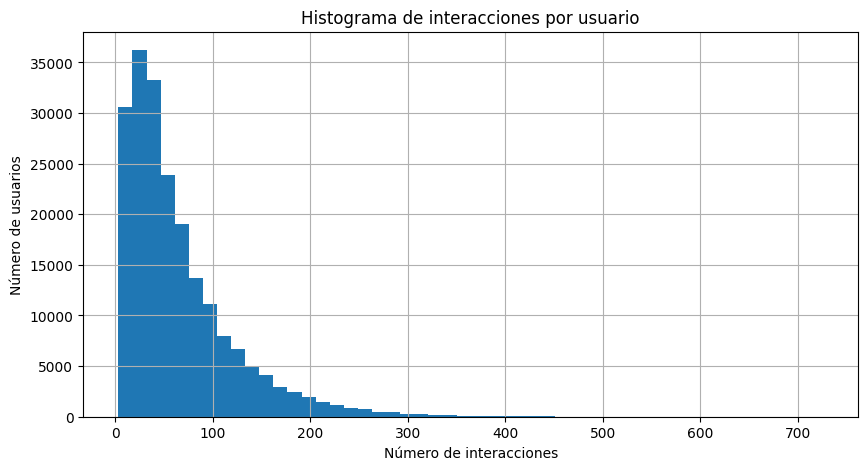

In [6]:
# analizar_interacciones.py
import pandas as pd

# Cargar el CSV que has generado
interacciones = pd.read_csv("data/interacciones_usuario_producto_limpio.csv")

print("✅ Interacciones cargadas correctamente.")
print(f"Número total de interacciones: {len(interacciones)}")

# Número de usuarios únicos y productos únicos
num_usuarios = interacciones['user_id'].nunique()
num_productos = interacciones['product_id'].nunique()

print(f"👤 Usuarios únicos: {num_usuarios}")
print(f"📦 Productos únicos: {num_productos}")

# Número de interacciones por usuario
interacciones_por_usuario = interacciones['user_id'].value_counts()
print(f"\n📊 Estadísticas de interacciones por usuario:")
print(interacciones_por_usuario.describe())

# Número de interacciones por producto
interacciones_por_producto = interacciones['product_id'].value_counts()
print(f"\n📦 Estadísticas de interacciones por producto:")
print(interacciones_por_producto.describe())

# Proporción de usuarios con pocas interacciones (menos de 5, menos de 10)
usuarios_menos_5 = (interacciones_por_usuario < 5).sum()
usuarios_menos_10 = (interacciones_por_usuario < 10).sum()

print(f"\n⚠️ Usuarios con menos de 5 interacciones: {usuarios_menos_5}")
print(f"⚠️ Usuarios con menos de 10 interacciones: {usuarios_menos_10}")

# Opcional: histograma visual si quieres
try:
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))
    interacciones_por_usuario.hist(bins=50)
    plt.title("Histograma de interacciones por usuario")
    plt.xlabel("Número de interacciones")
    plt.ylabel("Número de usuarios")
    plt.show()
except ImportError:
    print("Matplotlib no está instalado. Si quieres el gráfico, instala matplotlib.")


In [7]:
import pandas as pd
import numpy as np

# Cargar las interacciones limpias
interacciones = pd.read_csv("data/interacciones_usuario_producto_limpio.csv")

print("✅ Interacciones positivas cargadas.")
print(f"Número total de interacciones positivas: {len(interacciones)}")

# Obtener todos los usuarios y productos
usuarios = interacciones['user_id'].unique()
productos = interacciones['product_id'].unique()
productos_set = set(productos)

# Crear dataset de negativos
negativas = []

print("⚙️ Generando interacciones negativas...")

for user_id, group in interacciones.groupby('user_id'):
    productos_comprados = set(group['product_id'])
    productos_no_comprados = list(productos_set - productos_comprados)
    
    n_negativos = len(productos_comprados)  # 1:1 proporción
    if n_negativos > len(productos_no_comprados):
        n_negativos = len(productos_no_comprados)  # Por si no hay suficientes no comprados

    productos_negativos = np.random.choice(productos_no_comprados, size=n_negativos, replace=False)
    
    for product_id in productos_negativos:
        negativas.append({'user_id': user_id, 'product_id': product_id, 'comprado': 0})

# Convertir negativos a DataFrame
negativas_df = pd.DataFrame(negativas)
print(f"🔍 Número total de interacciones negativas generadas: {len(negativas_df)}")

# Unir positivos y negativos
interacciones['comprado'] = 1  # Asegurarse de que los positivos tengan el flag correcto
combinado = pd.concat([interacciones, negativas_df], ignore_index=True)

# Guardar el dataset combinado
output_path = "data/interacciones_usuario_producto_con_negativos.csv"
combinado.to_csv(output_path, index=False)
print(f"✅ Dataset combinado (positivas + negativas) guardado en '{output_path}'.")


✅ Interacciones positivas cargadas.
Número total de interacciones positivas: 13306345
⚙️ Generando interacciones negativas...
🔍 Número total de interacciones negativas generadas: 13306345
✅ Dataset combinado (positivas + negativas) guardado en 'data/interacciones_usuario_producto_con_negativos.csv'.


In [8]:
# entrenar_modelo_svd_usuario_producto.py
import os
import pandas as pd
from surprise import Dataset, Reader, SVD, dump, accuracy
from surprise.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# 📥 Cargar las interacciones con negativos
interacciones = pd.read_csv("data/interacciones_usuario_producto_con_negativos.csv")

print(f"✅ Dataset cargado con {len(interacciones)} interacciones totales (positivas + negativas).")

# 🎯 Preparar datos para Surprise
reader = Reader(rating_scale=(0, 1))
data = Dataset.load_from_df(interacciones[['user_id', 'product_id', 'comprado']], reader)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# 🚀 Definir y entrenar modelo SVD
algo = SVD(
    n_factors=150,
    n_epochs=35,
    lr_all=0.005,
    reg_all=0.04,
    verbose=False
)
algo.fit(trainset)

# 🧪 Evaluar el modelo
predictions = algo.test(testset)
rmse = accuracy.rmse(predictions, verbose=False)
mae = accuracy.mae(predictions, verbose=False)

y_true = [int(pred.r_ui >= 0.5) for pred in predictions]
y_pred = [int(pred.est >= 0.5) for pred in predictions]

precision = precision_score(y_true, y_pred, zero_division=0)
recall = recall_score(y_true, y_pred, zero_division=0)
f1 = f1_score(y_true, y_pred, zero_division=0)

# 💾 Guardar el modelo entrenado
carpeta_modelo = "modelo_usuario_producto"
os.makedirs(carpeta_modelo, exist_ok=True)
modelo_path = os.path.join(carpeta_modelo, "modelo_svd_usuario_producto.pkl")
dump.dump(modelo_path, algo=algo)

# 📝 Guardar las métricas
metricas_path = os.path.join(carpeta_modelo, "metricas_modelo.txt")
with open(metricas_path, "w") as f:
    f.write("📊 Métricas del modelo SVD usuario-producto\n")
    f.write("=" * 50 + "\n")
    f.write(f" - N interacciones totales: {len(interacciones)}\n")
    f.write(f" - RMSE      : {rmse:.4f}\n")
    f.write(f" - MAE       : {mae:.4f}\n")
    f.write(f" - Precision : {precision:.4f}\n")
    f.write(f" - Recall    : {recall:.4f}\n")
    f.write(f" - F1-score  : {f1:.4f}\n")
    f.write("=" * 50 + "\n")

print("\n✅ Modelo entrenado y guardado correctamente.")
print(f"📄 Métricas guardadas en '{metricas_path}'.")


✅ Dataset cargado con 26612690 interacciones totales (positivas + negativas).

✅ Modelo entrenado y guardado correctamente.
📄 Métricas guardadas en 'modelo_usuario_producto/metricas_modelo.txt'.
